In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv("/content/LADS_review_bersih_final.csv", index_col=0)

df = pd.read_csv("/content/LADS_review_3k_full_bersih.csv", encoding='latin-1')
df

,UserID,review_translated,sentiment
0,1,baguss,2
1,2,"infold gada niatan mau bikin Sylus, Zayne sama...",2
2,3,Mengapa Game ini tidak dimiringkan layar? Jika...,2
3,4,cinta cinta hati hati chuuuu ...,2
4,5,Sinyal bagus tapi susah masuk,2
...,...,...,...
2757,2758,"Sylus suami gans bgt, gak ada keluhan aku. Mak...",2
2758,2759,Mantep,2
2759,2760,makasih infold sudah membuat karakter seperti ...,2
2760,2761,Game yang bagus,2


In [3]:
#Jumlah baris dan kolom sebelum dilakukan pembersihan data
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 2762
Jumlah kolom: 3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             2762 non-null   int64 
 1   review_translated  2762 non-null   object
 2   sentiment          2762 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.9+ KB


In [5]:
df.isna().sum()

,0
UserID,0
review_translated,0
sentiment,0


In [6]:
df.drop(columns=['UserID'], inplace=True)

In [7]:
#Punctuation dan Case Folding
def bersihkan_teks(teks):
    # 1. Tambahkan baris ini untuk mengubah teks menjadi huruf kecil
    teks = teks.lower()

    # 2. Hapus tanda baca
    teks = re.sub(r'[^\w\s]', '', teks)

    # 3. Hapus angka
    teks = re.sub(r'\d+', '', teks)

    return teks
# Terapkan ke kolom 'review'
df['preprocessed_review'] = df['review_translated'].apply(bersihkan_teks)

In [8]:
df

,review_translated,sentiment,preprocessed_review
0,baguss,2,baguss
1,"infold gada niatan mau bikin Sylus, Zayne sama...",2,infold gada niatan mau bikin sylus zayne sama ...
2,Mengapa Game ini tidak dimiringkan layar? Jika...,2,mengapa game ini tidak dimiringkan layar jika ...
3,cinta cinta hati hati chuuuu ...,2,cinta cinta hati hati chuuuu
4,Sinyal bagus tapi susah masuk,2,sinyal bagus tapi susah masuk
...,...,...,...
2757,"Sylus suami gans bgt, gak ada keluhan aku. Mak...",2,sylus suami gans bgt gak ada keluhan aku makas...
2758,Mantep,2,mantep
2759,makasih infold sudah membuat karakter seperti ...,2,makasih infold sudah membuat karakter seperti ...
2760,Game yang bagus,2,game yang bagus


In [9]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat dalam dataset: {jumlah_duplikat}")

Jumlah baris duplikat dalam dataset: 101


In [10]:
df = df.drop_duplicates()

In [11]:
pip install pySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.6 MB/s eta 0:00:00


In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemover import StopWordRemover
from Sastrawi.Dictionary.ArrayDictionary import ArrayDictionary

factory = StopWordRemoverFactory()
stopword_bawaan = factory.get_stop_words()

kata_tambahan = ['aku','nya', 'dan', 'yang', 'tapi',
                 'padahal', 'bagu', 'please', 'bgt',
                 'ini', 'lagi','tidak', 'ga', 'g',
                 'gak', 'bisa', 'and', 'kasi', 'kao',
                 'itu', 'sih', 'nya', 'kenapa', 'terus',
                 'ya', 'y', 'mau', 'saya', 'juga',
                 'loh', 'lho', 'ada', 'ad', 'bwingits',
                 'bngt', 'banget', 'gwe', 'ko', 'bs',
                 'oukay', 'eok', 'anj', 'fakk', 'baiq',
                 'ngak', 'lah', 'udh', 'enggak', 'tapik',
                 'ak', 'anjr', 'aja', 'bikin', 'padahal',
                 'terus', 'donlod', 'malah', 'yg', 'bin',
                 'game', 'udah', 'tolong', 'overall', 'lu',
                 'kalo','pas', 'kasih', 'karna', 'gw',
                 'ku', 'dapet', 'gk', 'cuman', 'tau',
                 'tp', 'gue', 'tpi', 'kek', 'tetep',
                 'ber', 'main', 'download' ]

custom_stopword_list = stopword_bawaan + kata_tambahan

# 4. UBAH list menjadi objek ArrayDictionary (INI BAGIAN PENTINGNYA)
kamus_custom = ArrayDictionary(custom_stopword_list)

# 5. Buat StopWordRemover dengan kamus custom tersebut
remover = StopWordRemover(kamus_custom)

# 6. Terapkan ke DataFrame
df['stopword_review'] = df['preprocessed_review'].apply(lambda kalimat: remover.remove(kalimat))

/tmp/ipython-input-3290505658.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword_review'] = df['preprocessed_review'].apply(lambda kalimat: remover.remove(kalimat))


In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Buat objek stemmer (cukup sekali untuk efisiensi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# --- Terapkan Fungsi ke DataFrame ---
df['stemming_review'] = df['stopword_review'].apply(lambda kalimat: stemmer.stem(kalimat))

/tmp/ipython-input-1722445431.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming_review'] = df['stopword_review'].apply(lambda kalimat: stemmer.stem(kalimat))


In [14]:
df

,review_translated,sentiment,preprocessed_review,stopword_review,stemming_review
0,baguss,2,baguss,baguss,baguss
1,"infold gada niatan mau bikin Sylus, Zayne sama...",2,infold gada niatan mau bikin sylus zayne sama ...,infold gada niatan sylus zayne caleb long hair...,infold gada niat sylus zayne caleb long hair khh
2,Mengapa Game ini tidak dimiringkan layar? Jika...,2,mengapa game ini tidak dimiringkan layar jika ...,dimiringkan layar layar penuh dimiringkan ceri...,miring layar layar penuh miring cerita senang ...
3,cinta cinta hati hati chuuuu ...,2,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu
4,Sinyal bagus tapi susah masuk,2,sinyal bagus tapi susah masuk,sinyal bagus susah,sinyal bagus susah
...,...,...,...,...,...
2756,"Gamenya bagus, kita bisa berinteraksi sama kar...",2,gamenya bagus kita bisa berinteraksi sama kara...,gamenya bagus berinteraksi karakterkarakternya,gamenya bagus interaksi karakterkarakternya
2757,"Sylus suami gans bgt, gak ada keluhan aku. Mak...",2,sylus suami gans bgt gak ada keluhan aku makas...,sylus suami gans keluhan makasih papa infold s...,sylus suami gans keluh makasih papa infold suami
2758,Mantep,2,mantep,mantep,mantep
2759,makasih infold sudah membuat karakter seperti ...,2,makasih infold sudah membuat karakter seperti ...,makasih infold karakter sylus,makasih infold karakter sylus


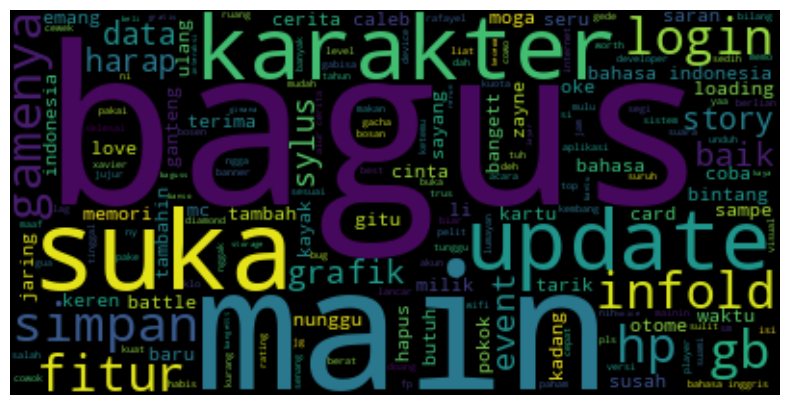

In [15]:
from wordcloud import WordCloud

# Start with one review:
text = ''.join(df.stemming_review)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Tampilkan gambar WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hilangkan sumbu x dan y
plt.show()

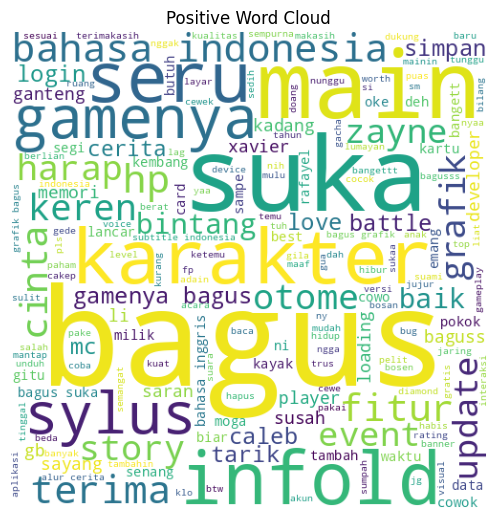

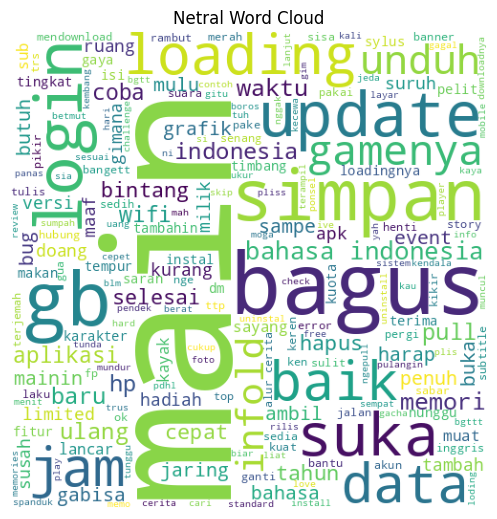

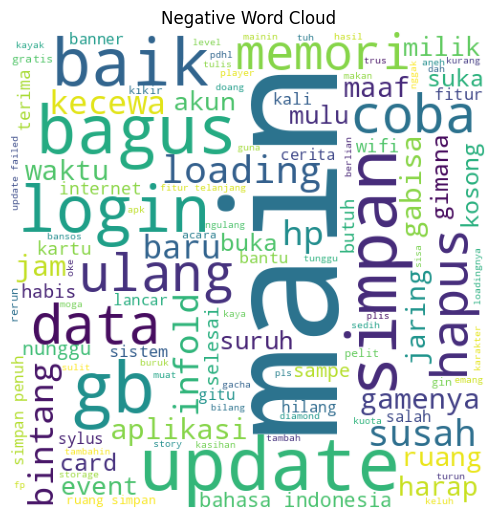

In [16]:
positif = df[df['sentiment']==2]['stemming_review'].str.cat(sep=', ')

#Netral
netral = df[df['sentiment']==1]['stemming_review'].str.cat(sep=', ')

# Negative
negatif = df[df['sentiment']==0]['stemming_review'].str.cat(sep=', ')

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of comments
positif_wc = wc.generate(positif)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(positif_wc)
plt.axis("off")
plt.title("Positive Word Cloud")
plt.tight_layout(pad = 0)
plt.show()
print('')

# Generate the world clouds for each type of comments
netral_wc = wc.generate(netral)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(positif_wc)
plt.axis("off")
plt.title("Netral Word Cloud")
plt.tight_layout(pad = 0)
plt.show()
print('')

# Generate the world clouds for each type of comments
negatif_wc = wc.generate(negatif)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(negatif_wc)
plt.axis("off")
plt.title("Negative Word Cloud")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df

,review_translated,sentiment,preprocessed_review,stopword_review,stemming_review
0,baguss,2,baguss,baguss,baguss
1,"infold gada niatan mau bikin Sylus, Zayne sama...",2,infold gada niatan mau bikin sylus zayne sama ...,infold gada niatan sylus zayne caleb long hair...,infold gada niat sylus zayne caleb long hair khh
2,Mengapa Game ini tidak dimiringkan layar? Jika...,2,mengapa game ini tidak dimiringkan layar jika ...,dimiringkan layar layar penuh dimiringkan ceri...,miring layar layar penuh miring cerita senang ...
3,cinta cinta hati hati chuuuu ...,2,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu
4,Sinyal bagus tapi susah masuk,2,sinyal bagus tapi susah masuk,sinyal bagus susah,sinyal bagus susah
...,...,...,...,...,...
2756,"Gamenya bagus, kita bisa berinteraksi sama kar...",2,gamenya bagus kita bisa berinteraksi sama kara...,gamenya bagus berinteraksi karakterkarakternya,gamenya bagus interaksi karakterkarakternya
2757,"Sylus suami gans bgt, gak ada keluhan aku. Mak...",2,sylus suami gans bgt gak ada keluhan aku makas...,sylus suami gans keluhan makasih papa infold s...,sylus suami gans keluh makasih papa infold suami
2758,Mantep,2,mantep,mantep,mantep
2759,makasih infold sudah membuat karakter seperti ...,2,makasih infold sudah membuat karakter seperti ...,makasih infold karakter sylus,makasih infold karakter sylus


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 4500)
tokenizer.fit_on_texts(df['stemming_review'])
sequences = tokenizer.texts_to_sequences(df['stemming_review'])
df['vectorized_review'] = sequences

/tmp/ipython-input-3683703175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vectorized_review'] = sequences


In [18]:
# Dapatkan semua nilai indeks dan cari yang terbesar
indeks_terbesar = max(tokenizer.word_index.values())

print(f"Word index terbesar adalah: {indeks_terbesar}")

Word index terbesar adalah: 4396


In [19]:
df

,review_translated,sentiment,preprocessed_review,stopword_review,stemming_review,vectorized_review
0,baguss,2,baguss,baguss,baguss,[61]
1,"infold gada niatan mau bikin Sylus, Zayne sama...",2,infold gada niatan mau bikin sylus zayne sama ...,infold gada niatan sylus zayne caleb long hair...,infold gada niat sylus zayne caleb long hair khh,"[9, 513, 393, 17, 36, 44, 1856, 1857, 1858]"
2,Mengapa Game ini tidak dimiringkan layar? Jika...,2,mengapa game ini tidak dimiringkan layar jika ...,dimiringkan layar layar penuh dimiringkan ceri...,miring layar layar penuh miring cerita senang ...,"[1258, 192, 192, 88, 1258, 19, 89, 3, 3, 429, ..."
3,cinta cinta hati hati chuuuu ...,2,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu,cinta cinta hati hati chuuuu,"[22, 22, 229, 229, 1860]"
4,Sinyal bagus tapi susah masuk,2,sinyal bagus tapi susah masuk,sinyal bagus susah,sinyal bagus susah,"[280, 1, 32]"
...,...,...,...,...,...,...
2756,"Gamenya bagus, kita bisa berinteraksi sama kar...",2,gamenya bagus kita bisa berinteraksi sama kara...,gamenya bagus berinteraksi karakterkarakternya,gamenya bagus interaksi karakterkarakternya,"[5, 1, 231, 1244]"
2757,"Sylus suami gans bgt, gak ada keluhan aku. Mak...",2,sylus suami gans bgt gak ada keluhan aku makas...,sylus suami gans keluhan makasih papa infold s...,sylus suami gans keluh makasih papa infold suami,"[17, 104, 4396, 256, 130, 845, 9, 104]"
2758,Mantep,2,mantep,mantep,mantep,[378]
2759,makasih infold sudah membuat karakter seperti ...,2,makasih infold sudah membuat karakter seperti ...,makasih infold karakter sylus,makasih infold karakter sylus,"[130, 9, 11, 17]"


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['vectorized_review'], df['sentiment'], test_size = 0.2, random_state = 0)

In [21]:
#Jumlah baris dan kolom sebelum dilakukan pembersihan data
print("Jumlah X_train:", X_train.shape)
print("Jumlah X_test", X_test.shape)

print("Jumlah X_train:", y_train.shape)
print("Jumlah X_test", y_test.shape)

Jumlah X_train: (2128,)
Jumlah X_test (533,)
Jumlah X_train: (2128,)
Jumlah X_test (533,)


Text(0.5, 1.0, 'Rating Distribution (Barplot)')

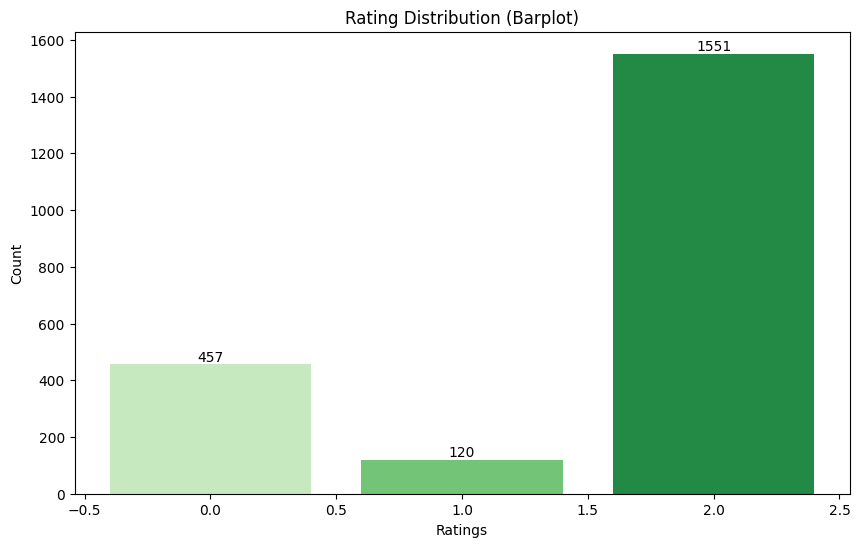

In [22]:
#Jumlah label pada y_train
score_counts = y_train.value_counts().sort_index()
colors = sns.color_palette('Greens', n_colors=len(score_counts))

# Membuat plot
plt.figure(figsize=(10, 6)) # Opsional: memperbesar ukuran plot agar label lebih jelas
plt.bar(score_counts.index, score_counts.values, color=colors)

# --- INI BAGIAN TAMBAHANNYA ---
# Loop melalui setiap bar untuk menambahkan label angka
for index, value in score_counts.items():
    plt.text(index, value, str(value), ha='center', va='bottom')
# -----------------------------

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating Distribution (Barplot)')

Text(0.5, 1.0, 'Rating Distribution (Barplot)')

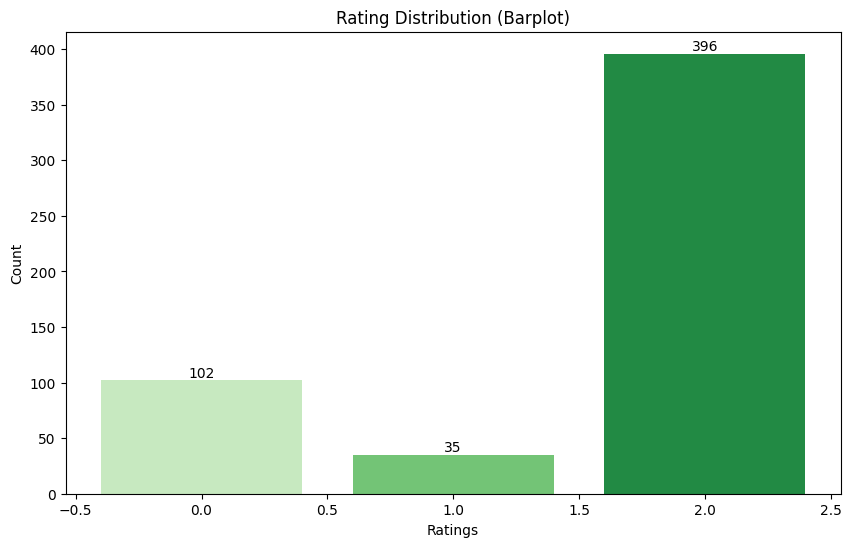

In [23]:
#Jumlah label pada y_test
score_counts = y_test.value_counts().sort_index()
colors = sns.color_palette('Greens', n_colors=len(score_counts))

# Membuat plot
plt.figure(figsize=(10, 6)) # Opsional: memperbesar ukuran plot agar label lebih jelas
plt.bar(score_counts.index, score_counts.values, color=colors)

# --- INI BAGIAN TAMBAHANNYA ---
# Loop melalui setiap bar untuk menambahkan label angka
for index, value in score_counts.items():
    plt.text(index, value, str(value), ha='center', va='bottom')
# -----------------------------

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating Distribution (Barplot)')

In [24]:
maxlen = 150

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
) # <-- INI BAGIAN YANG BERUBAH

# Latih model
model.fit(X_train, y_train)

# 5. EVALUASI MODEL
# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"Akurasi Model XGBoost: {accuracy:.2f}\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:15:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Akurasi Model XGBoost: 0.75

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.52      0.28      0.36       123
           1       0.00      0.00      0.00        20
           2       0.79      0.93      0.86       410

    accuracy                           0.75       553
   macro avg       0.44      0.40      0.41       553
weighted avg       0.70      0.75      0.72       553



In [25]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"Akurasi Model: {accuracy:.2f}\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.73

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.27      0.03      0.05       102
           1       0.00      0.00      0.00        35
           2       0.75      0.97      0.84       396

    accuracy                           0.73       533
   macro avg       0.34      0.33      0.30       533
weighted avg       0.61      0.73      0.64       533



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7298311444652908


In [27]:
# Konversi X_test ke DataFrame
X_test_df = pd.DataFrame(X_test)

# Sekarang kamu bisa pakai iloc
test = X_test_df.iloc[:1, :]
yhat = model.predict(test)
print("Prediksi kelas:", yhat)

Prediksi kelas: [2]


In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)